#### Ejemplo 1:  Clasificación de imágenes de paneles solares (60 minutos)

Objetivo: Demostrar cómo la IA puede clasificar imágenes de paneles solares en "funcionales" o "defectuosos".

Pasos:

1. Cargar un conjunto de datos pre-etiquetado de imágenes de paneles solares. https://www.kaggle.com/datasets/pythonafroz/solar-panel-images(opens in a new tab). Este conjunto de datos contiene imágenes de paneles solares etiquetadas como "funcionales" o "defectuosos".
2. Preprocesar las imágenes (redimensionar, normalizar).
3. Dividir el conjunto de datos en entrenamiento y prueba.
4. Crear un modelo de red neuronal convolucional simple usando TensorFlow/Keras.
5. Entrenar el modelo con los datos de entrenamiento.
6. Evaluar el modelo con los datos de prueba.
7. Demostrar la clasificación con nuevas imágenes.

## 1. Carga de conjunto de datos

### Bloque: Codigos a ejecutar en la terminal

In [2]:
import shutil
import os

os.makedirs("/home/codespace/.kaggle", exist_ok=True)
shutil.move("kaggle.json", "/home/codespace/.kaggle/kaggle.json")

os.chmod("/home/codespace/.kaggle/kaggle.json", 0o600)  # Asignar permisos correctos


In [3]:
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

dataset_path = "solar_panel_dataset"
os.makedirs(dataset_path, exist_ok=True)

api.dataset_download_files("pythonafroz/solar-panel-images", path=dataset_path, unzip=True)

print("Descarga completada. Archivos disponibles en:", os.listdir(dataset_path))

Dataset URL: https://www.kaggle.com/datasets/pythonafroz/solar-panel-images
Descarga completada. Archivos disponibles en: ['Faulty_solar_panel']


In [60]:
import os

ruta_json = "/home/codespace/.kaggle/kaggle.json"

if os.path.exists(ruta_json):
    print(f"El archivo kaggle.json está en: {ruta_json}")
else:
    print("No se encontró kaggle.json en la ruta esperada.")


El archivo kaggle.json está en: /home/codespace/.kaggle/kaggle.json


In [9]:
#import os
#from kaggle.api.kaggle_api_extended import KaggleApi

# Configurar las credenciales de Kaggle directamente en el código
#os.environ["KAGGLE_USERNAME"] = "johannazuluagaquiros"  # Reemplaza con tu username
#os.environ["KAGGLE_KEY"] = "c8adfaf3fe5ed0ea2c3da5dbbabb695f"  # Reemplaza con tu API key

# Autenticación con Kaggle
#api = KaggleApi()
#api.authenticate()

# Definir el directorio donde se guardará el dataset
#dataset_path = "solar_panel_dataset"
#os.makedirs(dataset_path, exist_ok=True)

# Descargar y extraer el dataset
#api.dataset_download_files("pythonafroz/solar-panel-images", path=dataset_path, unzip=True)

#print("Descarga completada. Archivos disponibles en:", os.listdir(dataset_path))

In [61]:
# Inspeccionar estructura del dataset
def inspeccionar_estructura(ruta):
    for root, dirs, files in os.walk(ruta):
        print(f"Carpeta: {root}")
        print("Archivos:", files[:5], "...\n")
        break  # Solo mostrar la primera carpeta

inspeccionar_estructura(dataset_path)

Carpeta: solar_panel_dataset
Archivos: [] ...



### 2. Preprocesar las imágenes (redimensionar, normalizar)

In [6]:
#!pip install opencv-python

In [11]:
#!apt-get install -y libgl1-mesa-glx


In [12]:
#!pip install opencv-python-headless

In [62]:
# Definir las categorías
class_names = ["Snow-Covered", "Dusty", "Electrical-damage", "Clean", "Bird-drop", "Physical-Damage"]


In [63]:
#!pip install numpy
#!pip install scikit-learn
#!pip install opencv-python
import numpy as np
import cv2
# Función para cargar y preprocesar las imágenes
# Función para cargar y preprocesar las imágenes
def cargar_datos(ruta, img_size=(150, 150)):
    imagenes = []
    etiquetas = []
    
    for i, categoria in enumerate(class_names):
        categoria_path = os.path.join(ruta, categoria)
        if not os.path.isdir(categoria_path):
            continue
        for archivo in os.listdir(categoria_path):
            img_path = os.path.join(categoria_path, archivo)
            img = cv2.imread(img_path)
            if img is None:
                continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, img_size)
            img = img / 255.0  # Normalización
            imagenes.append(img)
            etiquetas.append(i)  # Índice de la clase
    return np.array(imagenes), np.array(etiquetas)

In [66]:
from sklearn.model_selection import train_test_split

# Cargar datos
X, y = cargar_datos(os.path.join(dataset_path, "Faulty_solar_panel"))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:

# Verificar que se cargaron datos correctamente
if X.size == 0 or y.size == 0:
    raise ValueError("No se pudieron cargar datos de imágenes. Verifica la estructura del dataset.")


In [68]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Aplicar aumento de datos
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)
datagen.fit(X_train)

In [89]:

from tensorflow.keras import layers, models

# Crear modelo CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),  # Regularización
    layers.Dense(len(class_names), activation='softmax')
])



In [90]:

# Compilar modelo
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [91]:
# Entrenar modelo
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=25, 
                    validation_data=(X_test, y_test))

Epoch 1/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.2143 - loss: 1.7437 - val_accuracy: 0.2299 - val_loss: 1.7127
Epoch 2/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.2691 - loss: 1.7171 - val_accuracy: 0.3621 - val_loss: 1.6291
Epoch 3/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.3541 - loss: 1.6433 - val_accuracy: 0.3678 - val_loss: 1.5548
Epoch 4/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.3815 - loss: 1.5752 - val_accuracy: 0.4023 - val_loss: 1.4988
Epoch 5/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 21s 982ms/step - accuracy: 0.3458 - loss: 1.5395 - val_accuracy: 0.4483 - val_loss: 1.4221
Epoch 6/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 21s 949ms/step - accuracy: 0.3952 - loss: 1.5453 - val_accuracy: 0.4713 - val_loss: 1.3946
Epoch 7/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 21s 960ms/step - accuracy: 0.4099 - loss: 1.4959 - val_accuracy: 0.3621 - val_loss: 1.5407
Epoch 8/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.3977 - loss: 1.4896 - val_accuracy: 0.3736 - 

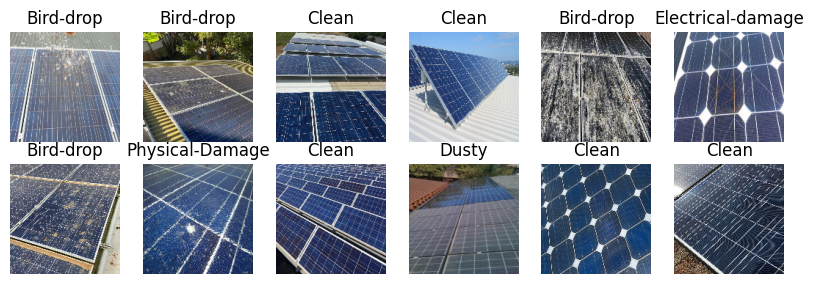

In [92]:
# Visualizar imágenes de entrenamiento
plt.figure(figsize=(10, 10))
for i in range(12):
    ax = plt.subplot(6, 6, i + 1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i]])
    plt.axis("off")
plt.show()

In [93]:
# Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nPrecisión en el conjunto de prueba: {test_acc}')

6/6 - 1s - 212ms/step - accuracy: 0.5977 - loss: 1.1599

Precisión en el conjunto de prueba: 0.5977011322975159


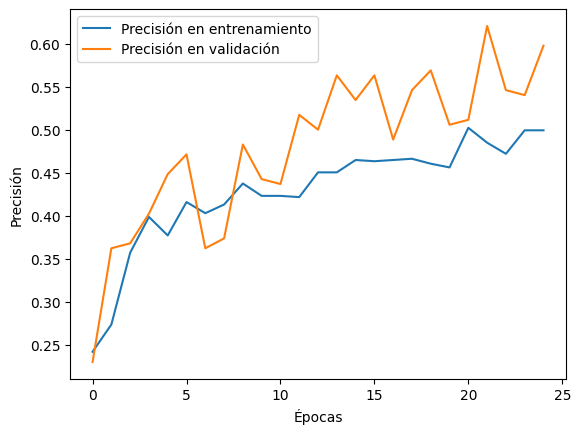

In [94]:
# Visualizar métricas
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

In [95]:
# Función para cargar múltiples imágenes y predecir
def cargar_varias_imagenes(ruta, img_size=(150, 150)):
    imagenes = []
    nombres = []
    for archivo in os.listdir(ruta):
        img_path = os.path.join(ruta, archivo)
        img = cv2.imread(img_path)
        if img is None:
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, img_size)
        img = img / 255.0  # Normalización
        imagenes.append(img)
        nombres.append(archivo)
    return np.array(imagenes), nombres

In [36]:
# Definir la ruta de la carpeta con nuevas imágenes
nueva_imagenes_path = "nuevas imagenes"

In [96]:

# Cargar imágenes nuevas y predecir
ruta_imagenes = "nuevas imagenes"
imagenes_nuevas, nombres_imagenes = cargar_varias_imagenes(ruta_imagenes)
predicciones = model.predict(imagenes_nuevas)
predicciones_clases = np.argmax(predicciones, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


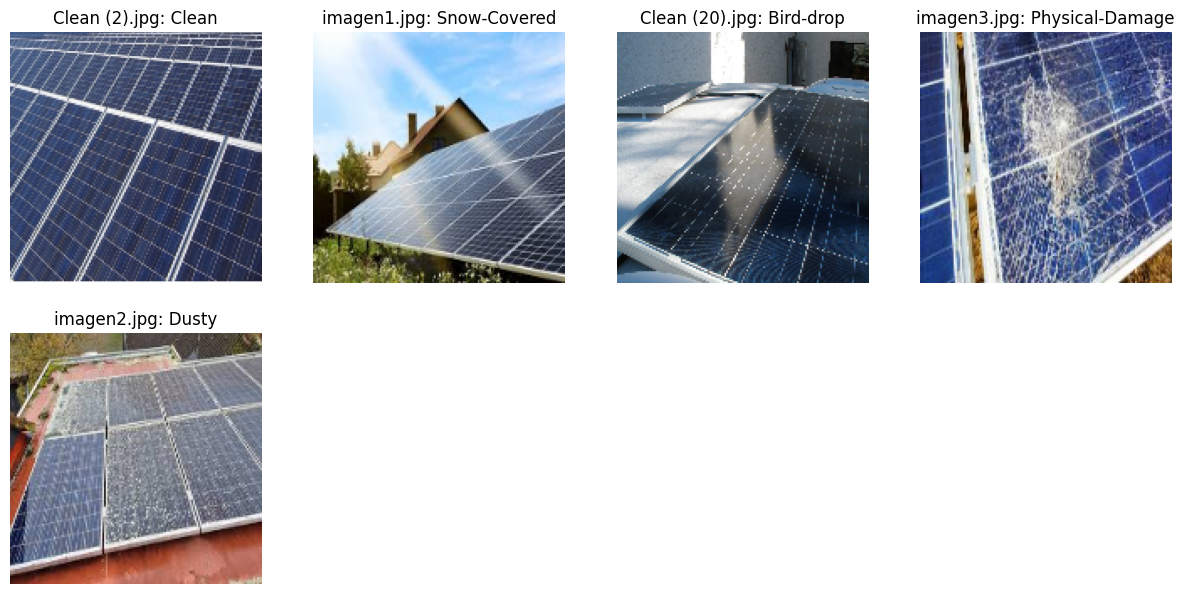

In [98]:
# Mostrar predicciones
plt.figure(figsize=(15, 15))
for i in range(len(imagenes_nuevas)):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(imagenes_nuevas[i])
    plt.title(f"{nombres_imagenes[i]}: {class_names[predicciones_clases[i]]}")
    plt.axis("off")
plt.show()